In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()



In [92]:
 y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
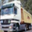

In [93]:
x_train[1]

In [94]:
#plt.imshow(x_train[1],cmap="gray")

In [95]:
print(f"Training data shape: {x_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test target shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training target shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test target shape: (10000, 1)


In [96]:
from sklearn.model_selection import train_test_split
import numpy as np


In [97]:
x_train = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0


#we combine our data for split it base on the %

In [98]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [99]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=42)


In [100]:
#10% of the training for validation
x_train2, x_validation, y_train2, y_validation = train_test_split(x_train1, y_train1, test_size=0.1, random_state=42)


In [101]:
print(f"New training data shape: {x_train2.shape}")
print(f"New validation data shape: {x_validation.shape}")
print(f"New test data shape: {x_test1.shape}")

New training data shape: (45900, 32, 32, 3)
New validation data shape: (5100, 32, 32, 3)
New test data shape: (9000, 32, 32, 3)


In [102]:
#we encode the target
y_train2_onehot = tf.keras.utils.to_categorical(y_train2, 10)
y_validation_onehot = tf.keras.utils.to_categorical(y_validation, 10)
y_test1_onehot = tf.keras.utils.to_categorical(y_test1, 10)

In [147]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [148]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [149]:
history = model.fit(x_train2, y_train2_onehot, epochs=10, validation_data=(x_validation, y_validation_onehot))


Epoch 1/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.1232 - loss: 7.3118 - val_accuracy: 0.1406 - val_loss: 2.2929
Epoch 2/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.1873 - loss: 2.1853 - val_accuracy: 0.2424 - val_loss: 2.0559
Epoch 3/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.2865 - loss: 1.9461 - val_accuracy: 0.3163 - val_loss: 1.8807
Epoch 4/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0.3228 - loss: 1.8502 - val_accuracy: 0.3294 - val_loss: 1.8023
Epoch 5/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3422 - loss: 1.8035 - val_accuracy: 0.3418 - val_loss: 1.7935


In [106]:
pip install keras-tuner --upgrade


In [107]:
import keras_tuner as kt


In [108]:
def build_model(hp):
    model = keras.Sequential()

    model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

    model.add(keras.layers.Dense(units=hp.Choice('units', [32,64, 128, 256,512]),
        activation='relu'))

    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.Dense(
            units=hp.Choice(f'layer_{i}_units', [32,64, 128, 256,512]),
            activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))



    model.compile(
        optimizer=keras.optimizers.Adam( learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3, 1e-2])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])


    return model




In [109]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [110]:
tuner.search(x_train2, y_train2_onehot, epochs=10, validation_data=(x_validation, y_validation_onehot))
best_model = tuner.get_best_models()[0]



Trial 5 Complete [00h 02m 28s]
val_loss: 2.3025548458099365

Best val_loss So Far: 2.260125160217285
Total elapsed time: 01h 19m 03s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [111]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [112]:
y_train_pred = model.predict(x_train2)
y_val_pred = model.predict(x_validation)
y_test_pred = model.predict(x_test1)

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [113]:
y_train_pred

array([[0.10323302, 0.11143734, 0.10438831, ..., 0.08385971, 0.08769093,
        0.09594622],
       [0.05539427, 0.27069744, 0.01642528, ..., 0.0289006 , 0.08587487,
        0.46561614],
       [0.12056588, 0.05636668, 0.11891472, ..., 0.11313632, 0.04303808,
        0.05876807],
       ...,
       [0.03275213, 0.05251814, 0.08707981, ..., 0.04633386, 0.04332992,
        0.01634087],
       [0.14768963, 0.09496798, 0.07953951, ..., 0.09889074, 0.10104244,
        0.11020239],
       [0.12183593, 0.1257191 , 0.03671542, ..., 0.09049261, 0.11607154,
        0.3487235 ]], dtype=float32)

In [114]:
y_train_pred_labels = y_train_pred.argmax(axis=1)
y_val_pred_labels = y_val_pred.argmax(axis=1)
y_test_pred_labels = y_test_pred.argmax(axis=1)


In [115]:
train_acc = accuracy_score(y_train2, y_train_pred_labels)
val_acc = accuracy_score(y_validation, y_val_pred_labels)
test_acc = accuracy_score(y_test1, y_test_pred_labels)


In [116]:
train_f1 = f1_score(y_train2, y_train_pred_labels, average='macro')
val_f1 = f1_score(y_validation, y_val_pred_labels, average='macro')
test_f1 = f1_score(y_test1, y_test_pred_labels, average='macro')


In [117]:
train_roc_auc = roc_auc_score(y_train2_onehot, y_train_pred, multi_class='ovr')
val_roc_auc = roc_auc_score(y_validation_onehot, y_val_pred, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test1_onehot, y_test_pred, multi_class='ovr')


In [118]:
import pandas as pd
results = pd.DataFrame({
    'Dataset': ['Train', 'Validation', 'Test'],
    'Accuracy': [train_acc, val_acc, test_acc],
    'F1-Score': [train_f1, val_f1, test_f1],
    'ROC-AUC': [train_roc_auc, val_roc_auc, test_roc_auc]
})

In [119]:
print(results)


      Dataset  Accuracy  F1-Score   ROC-AUC
0       Train  0.327168  0.300961  0.779204
1  Validation  0.328824  0.299892  0.777923
2        Test  0.313556  0.289951  0.772936


#Wide and Deep Network

In [150]:
x =keras.layers.Input(shape=(32, 32, 3))
input_ = layers.Flatten()(x)

hidden_layer1 =keras.layers.Dense(512, activation='relu')(input_)
hidden_layer2 = keras.layers.Dense(256, activation='relu')(hidden_layer1)
hidden_layer3 =keras.layers.Dense(128, activation='relu')(hidden_layer2)
hidden_layer4 =keras.layers.Dense(64, activation='relu')(hidden_layer3)
hidden_layer5 =keras.layers.Dense(32, activation='relu')(hidden_layer4)

flatten_hidden = layers.Flatten()(hidden_layer5)

concatenate_layer= keras.layers.Concatenate()([input_,flatten_hidden])

output =keras.layers.Dense(10, activation='softmax')(concatenate_layer)

In [121]:
model_WD=keras.Model(inputs=[x],outputs=[output])

In [122]:
model_WD.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [123]:
model_WD.fit(x_train2, y_train2_onehot, epochs=10, validation_data=(x_validation, y_validation_onehot))


Epoch 1/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.1854 - loss: 48.1676 - val_accuracy: 0.1745 - val_loss: 86.9566
Epoch 2/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.2320 - loss: 48.6796 - val_accuracy: 0.2422 - val_loss: 45.6984
Epoch 3/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.2438 - loss: 44.2577 - val_accuracy: 0.2339 - val_loss: 46.5484
Epoch 4/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.2569 - loss: 47.3099 - val_accuracy: 0.1957 - val_loss: 58.3011
Epoch 5/5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.2552 - loss: 46.1431 - val_accuracy: 0.2575 - val_loss: 46.8735


In [124]:
x_test1[2]

array([[[0.5529412 , 0.72156864, 0.48235294],
        [0.42352942, 0.67058825, 0.38431373],
        [0.50980395, 0.6901961 , 0.44313726],
        ...,
        [0.65882355, 0.8509804 , 0.5568628 ],
        [0.6117647 , 0.8117647 , 0.54901963],
        [0.5137255 , 0.7254902 , 0.49803922]],

       [[0.5882353 , 0.7137255 , 0.5176471 ],
        [0.5176471 , 0.6666667 , 0.44313726],
        [0.5686275 , 0.68235296, 0.48235294],
        ...,
        [0.7019608 , 0.90588236, 0.5882353 ],
        [0.5294118 , 0.80784315, 0.5019608 ],
        [0.23921569, 0.5764706 , 0.28627452]],

       [[0.6156863 , 0.7019608 , 0.5411765 ],
        [0.60784316, 0.6745098 , 0.50980395],
        [0.60784316, 0.6745098 , 0.5176471 ],
        ...,
        [0.69411767, 0.9137255 , 0.5764706 ],
        [0.32941177, 0.67058825, 0.33333334],
        [0.10196079, 0.5372549 , 0.20392157]],

       ...,

       [[0.05098039, 0.29411766, 0.03921569],
        [0.02745098, 0.33333334, 0.09019608],
        [0.2       , 0

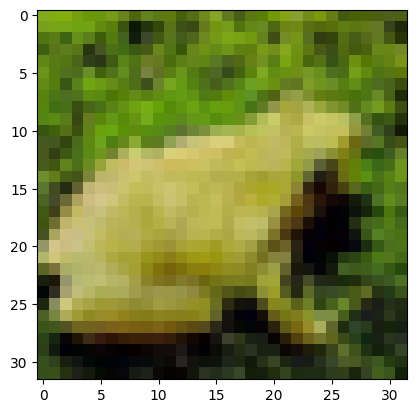

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
True prediction
Predicted class: 6, True class: 6


In [153]:

import numpy as np
import matplotlib.pyplot as plt

random_idx = np.random.randint(len(x_test1))
img = x_test1[random_idx]

plt.imshow(img)
plt.show()

prediction = model_WD.predict(np.expand_dims(img, axis=0))

predicted_class = np.argmax(prediction)

true_class = y_test1[random_idx][0]

if predicted_class == true_class:
    print("True prediction")
    print(f"Predicted class: {predicted_class}, True class: {true_class}")
else:
    print(f"Wrong prediction: {predicted_class}, True class: {true_class}")


In [126]:
x_test1[2]

array([[[0.5529412 , 0.72156864, 0.48235294],
        [0.42352942, 0.67058825, 0.38431373],
        [0.50980395, 0.6901961 , 0.44313726],
        ...,
        [0.65882355, 0.8509804 , 0.5568628 ],
        [0.6117647 , 0.8117647 , 0.54901963],
        [0.5137255 , 0.7254902 , 0.49803922]],

       [[0.5882353 , 0.7137255 , 0.5176471 ],
        [0.5176471 , 0.6666667 , 0.44313726],
        [0.5686275 , 0.68235296, 0.48235294],
        ...,
        [0.7019608 , 0.90588236, 0.5882353 ],
        [0.5294118 , 0.80784315, 0.5019608 ],
        [0.23921569, 0.5764706 , 0.28627452]],

       [[0.6156863 , 0.7019608 , 0.5411765 ],
        [0.60784316, 0.6745098 , 0.50980395],
        [0.60784316, 0.6745098 , 0.5176471 ],
        ...,
        [0.69411767, 0.9137255 , 0.5764706 ],
        [0.32941177, 0.67058825, 0.33333334],
        [0.10196079, 0.5372549 , 0.20392157]],

       ...,

       [[0.05098039, 0.29411766, 0.03921569],
        [0.02745098, 0.33333334, 0.09019608],
        [0.2       , 0

In [127]:
y_test1[:]

array([[1],
       [9],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=uint8)

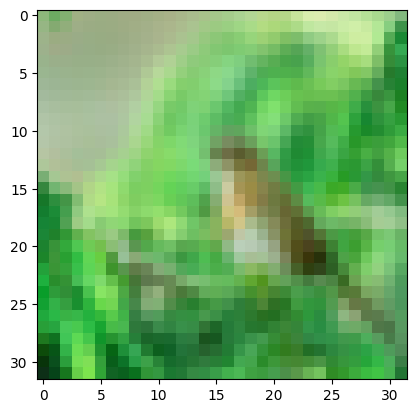

In [128]:
plt.imshow(x_test1[2])
